# Introduction to Python for Environmental Science - 3. Gridded Data

![JCEEI logo](../../jceei_logo.png)

## Tutorial
In this notebook we are going to look at data models for a different sort of data compared to the **tabular data**, called  **gridded data**. One definition of gridded data is as follows:

>Gridded data is two-dimensional data representing an atmospheric or oceanic parameter along an evenly spaced matrix. For the matrix to be useful, ancillary information about the grid must also be known. This ancillary information, along with the gridded data, is collectively called a grid object.

[quote source](https://www.ssec.wisc.edu/mcidas/doc/prog_man/2015/access-3.html#:~:text=Gridded%20data%20is%20two%2Ddimensional,collectively%20called%20a%20grid%20object)

We will be looking at manipulating multi-dimensional array manually, and then an  easier way to work with gridded data by incorporating a data model using an equivalent libraries for gridded data to pandas for tabular data.

### Data Structure

Gridded data is fundamentally an n-dimensional array, in the simplest case a 2D array. Tabular data is essentially a 2D. array as well, but for tabular data the row represent data point or observations, and the columns represent features. For gridded data, each dimension in the grid or array is a dimension of the measurement, of which there can be more than 2, for example latitude, longitude, height and time. Different physical quantities or phenomena are represented by separate multi-dimensional arrays. for example wind or temperature, compared to tabular data where typically different columns represented different phenomena.

### Metadata

While the raw data is just a multidimensional array, we use metadata to describe what the data really means and how the data maps to the physical meaning in the real world. For example linking specific values in the array to specific latitudes/longitudes in the real-world. This metadata  together with the data forms our data model for gridded data. Typically the metadata will be stored in seprate arrays, for a example a series of 1D arrays, one for each of the dimensions of the data array, which describes the position of each point such as a 1D array of latitude values or time stamps.




|  Data Array  | 0 | 1 | 2 |
|--|--|--|--|
| 0 | 12.34 | 13.45 | 13.12 |
| 1 | 12.76 | 12.98 | 12.66 |
| | | | |


| Latitude | 0 | 1 | 
|--|--|--|
| | 50.0 | 51.0 |

| Longitude | 0 | 1 | 2 |
|--|--|--|--|
| | -5.0 | -4.0 | -3.0|

By adding metadata to create a data model we can write functions and libraries that provide a more intuitive way to interact programmatically with the data that is more aligned with our understanding of what the data means. For example we can easily subset based on location or a time window. We can then calculate statistics for that area by summing or averaging over relevant dimensions. For example we might want to find the average temperature over an area for each time period. Or we might want to find the total rainfalll over a whole dataset for each spatial location in our dataset.}


## Gridded data tools

To work with this particular way of storing and manipulating data, we will need tools that designed and built to work with these abstractions. In this tutorial, we will tak a look at two commonly used python tools: *Iris* and *Xarray*

### Iris Python Library
![Iris Logo](https://scitools-iris.readthedocs.io/en/latest/_static/iris-logo-title.svg)

The Iris library is a python package, initially developed by the Met Office but now a community developed and mainitained package, for analysing and visualising weather and climate data.

Iris can read from several different formats, with most popular being the standard NetCDF format which is widely used for weather and climate data.

Each grid or array in gridded data usually reperesents different physical phenomena. A file such as a NetCDF file may contain many different grids representing many different phenomena, usually measured on the same grid i.e. at the same location in space and time. Each multidimensional array of gridded data in the file is read into its own data object called a cube. According to the Iris documentation

A single cube describes one and only one phenomenon, always has a name, a unit and an n-dimensional data array to represents the cube’s phenomenon. In order to locate the data spatially, temporally, or in any other higher-dimensional space, a collection of coordinates exist on the cube.

Documentation:
* [Iris docs home](https://scitools.org.uk/iris/docs/latest/)
* [Iris Examples Gallery](https://scitools.org.uk/iris/docs/latest/gallery.html)
* [Iris documentation on data structures](https://scitools.org.uk/iris/docs/latest/userguide/iris_cubes.html#iris-data-structures)


### Xarray Python library

![Xarray Logo](https://docs.xarray.dev/en/stable/_static/dataset-diagram-logo.png)

Xarray is another library to work with gridded data. It has 2 key data strcutures:
* *Data Array* - The python object for holding a multi-dimensional array representing a single phenomenon with associated metadata.
* *Dataset* - The python object for holding several data arrays that are associated (usually representing the same physical location and time period) with associated global metadata.

A key difference between xarray and iris is the treatment of metadata. A key requirement of Iris is to produce standards compliannt metadata, as this a requirement for many international collaborations that the Met Office contributes to. This can make working with some data difficult in Iris when the metadata has not been carefully produced. Xarray is less picky. This means that sometimes you will lose important metadata. The other difference is the API. Xarray aims to have an interface more similar to pandas in its design compared to iris. Whether this is a good thing or not is up to the individual user...

Documentation
* [Xarray Docs](https://docs.xarray.dev/en/stable/)
* [Xarray Gallery](https://docs.xarray.dev/en/stable/gallery.html)
* [Xarray Data Structures](https://docs.xarray.dev/en/stable/user-guide/data-structures.html)

### Key terms
* *gridded* - weather parameters mapped onto a regular geographical grid e.g. output from any of the Numerical Weather Prediction model or radar. Gridded data is useful when you need to analyse the weather across a wide area.
* *dimension* - The size of each axis of the array. For example in an image, you have two dimensions, the vertical and horizontal. Typical dimensions in environmental data include latitude, longitude, altitude and time.
* *resolution* - climate models split the Earth's atmosphere and ocean into a finite number of grid boxes (similar to the pixels on a digital camera) - the higher the number of grid boxes, the higher (or finer) the spatial resolution. For example, a model with a horizontal resolution of 1 degree would have 360 (latitude) x 180 (longitude) = 64,800 grid boxes. The height of the atmosphere, and the depth of the ocean are split into distinct layers - so the number of these layers determines the vertical resolution of the model.

[Met Office Data Glossary](https://www.metoffice.gov.uk/services/data/business-data/glossary)





## Exercises 

To demonstrate how we use Iris and Xarray to easily interact with gridded data through a data model, we will use some real Met Office simulation output datasets.Instructions are below for how to get the data to be able to run the notebook, and also some background information on the dataset.

### Getting the sample data

The sample data for use with this notebook is available from Zenodo.

* UKV selected variables November 2019 - High resolution weather data over the United Kingdom [zenodo archive](https://doi.org/10.5281/zenodo.7101562)
* UKCP RCP85 selected variables for Dec 2065 to Nov 2066 [zenodo archive](https://doi.org/10.5281/zenodo.7101557)

You can download the data using wget, for example
``` bash
wget https://zenodo.org/record/7101563/files/ukv.tgz $HOME/data
wget https://zenodo.org/record/7101557/files/ukcp_rcp85.tgz $HOME/data
``` 

then unzip the data as follows
``` bash
cd $HOME/data/
tar xvzf ukv.tgz
tar xvzf ukcp_rcp85.tgz
```

The notebooks will expect the data in the locations created by those commands. Update the `sample_data_root` variable if you have downloaded and extracted the data to another location.


### Exploring Weather Model data - UKV Weather Dataset

The first dataset is a high-resolution weather dataset covering the whole of the UK (and some surrounding sea and land) called UKV. When running numerical weather models, the area covered by the forescast model is divide into squares of a certain size, called grid cells. Each weahther phenomena is the grid cell is represented by one number. Thus each value in the array represents a weather phenomena for a whole 2.2km x 2.2km square of land.

The data grid has dimensions in latitude and longitude, as well as as time.

The data is arranged into directories by variable. Tis code constructs a list of files, each file containing a single phenomena for a single time. This code join the times together into a single cube.

Further reading
* [General information on Met Office Weather Models](https://www.metoffice.gov.uk/research/approach/modelling-systems/unified-model/weather-forecasting)
* [UKV High-resolution UK forecast model -  PDF](https://www.metoffice.gov.uk/binaries/content/assets/metofficegovuk/pdf/data/ukv_model_data_sheet_2019.pdf)

We start by importing relevant packages, such as base python packages, iris and xarray for working with gridded data, and matplotlib for plotting.

In [1]:
import os
import pathlib
import datetime

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
import pandas
import numpy

In [4]:
import iris
import iris.quickplot
import cartopy

In [5]:
import xarray

In [6]:
import matplotlib
import matplotlib.pyplot as plt

Next we set up the path to the data and load in the data from mutliple files into a data structure.

In [7]:
sample_data_root = pathlib.Path(os.environ['HOME']) / 'data'
sample_data_root

PosixPath('/Users/stephen.haddad/data')

In [8]:
ukv_root_dir  = sample_data_root / 'intro_python_ds' / 'ukv'
print(ukv_root_dir.is_dir())

True


In [9]:
ukv_var_list = {p1.stem: p1 for p1 in ukv_root_dir.glob('*')}
list(ukv_var_list.keys())

['t1o5m_min',
 'pmsl_mean',
 'windspeed_mean',
 't1o5m_mean',
 't1o5m_max',
 'windgust_max',
 'rain_mean']

In [10]:
current_var = 't1o5m_max'
current_var

't1o5m_max'

In [11]:
ukv_temp_max = iris.load_cube([str(p1) for p1 in ukv_var_list[current_var].iterdir()])

### Multi-dimensional array in Numpy

Before we look at manipulating data with Iris and Xarray, for comparison we'll demonstrate directly manipulating the data without the associated data model and metadata, using the general numerical copmputing library numpy.

In [12]:
ukv_temp_max_array = ukv_temp_max.data
ukv_temp_max_array

masked_array(
  data=[[[289.25   , 289.25   , 289.25   , ..., 289.28125, 289.28125,
          289.23438],
         [289.25   , 289.25   , 289.23438, ..., 289.26562, 289.03125,
          289.0625 ],
         [289.23438, 289.23438, 289.23438, ..., 288.95312, 288.79688,
          288.85938],
         ...,
         [282.70312, 282.70312, 282.70312, ..., 282.51562, 282.48438,
          282.48438],
         [282.71875, 282.71875, 282.71875, ..., 282.5    , 282.5    ,
          282.46875],
         [282.73438, 282.73438, 282.73438, ..., 282.5    , 282.46875,
          282.40625]],

        [[287.39062, 287.40625, 287.42188, ..., 289.     , 288.98438,
          288.9375 ],
         [287.4375 , 287.4375 , 287.40625, ..., 288.98438, 288.67188,
          288.73438],
         [287.4375 , 287.42188, 287.39062, ..., 288.57812, 288.26562,
          288.42188],
         ...,
         [283.28125, 283.29688, 283.29688, ..., 283.14062, 283.14062,
          283.125  ],
         [283.26562, 283.28125, 283.

In [13]:
ukv_temp_max_array.shape

(30, 808, 621)

In [14]:
ukv_temp_max_array[0,:,:]

masked_array(
  data=[[289.25   , 289.25   , 289.25   , ..., 289.28125, 289.28125,
         289.23438],
        [289.25   , 289.25   , 289.23438, ..., 289.26562, 289.03125,
         289.0625 ],
        [289.23438, 289.23438, 289.23438, ..., 288.95312, 288.79688,
         288.85938],
        ...,
        [282.70312, 282.70312, 282.70312, ..., 282.51562, 282.48438,
         282.48438],
        [282.71875, 282.71875, 282.71875, ..., 282.5    , 282.5    ,
         282.46875],
        [282.73438, 282.73438, 282.73438, ..., 282.5    , 282.46875,
         282.40625]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

In [15]:
ukv_temp_max_array[0,:,:].min(), ukv_temp_max_array[0,:,:].max()

(276.45312, 290.98438)

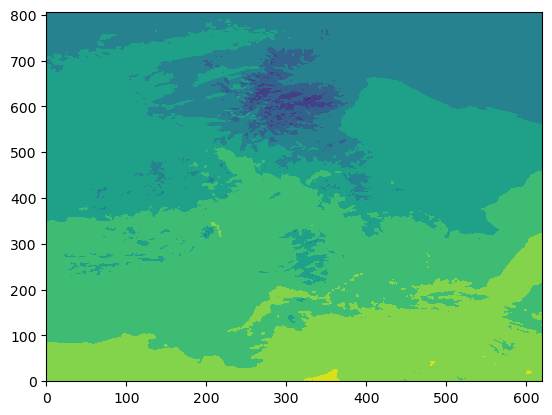

In [16]:
fig1 = matplotlib.pyplot.figure()
ax1 = fig1.add_subplot(1,1,1)
ax1.contourf(ukv_temp_max_array[0,:,:])

As you can see we can do general mathematical and visualisation operations, but we can't easily see from the code what those computations mean in the real world.

### Iris and Data Cubes
With Iris, instead of working directly with the array, we work with the a *cube*, which combines the data and metadata so that we can work with concepts and values that have transparent real world meaning. To start with, in a Jupyter notebook Iris provides a graphical depiction of the cube which we can show as follows.


In [17]:
ukv_temp_max

<iris 'Cube' of air_temperature / (K) (time: 30; grid_latitude: 808; grid_longitude: 621)>

### Exploring Data Characteristics

One of the first things we may want to do with the data is explore the range of values contained. 

First we may be interested in the range of metadata values, to see what spatial and temporal location is contained. In this dataset its not that easy because we're using grid_latitude and grid_longitude to describe spatial location. We'll explore what that means a bit later.

In [18]:
ukv_temp_max.coords()

[<DimCoord: time / (hours since 1970-01-01 00:00:00)  [...]+bounds  shape(30,)>,
 <DimCoord: grid_latitude / (degrees)  [-3.757, -3.744, ..., 7.124, 7.137]  shape(808,)>,
 <DimCoord: grid_longitude / (degrees)  [354.942, ...]  shape(621,)>,
 <DimCoord: forecast_period / (hours)  [2.5]+bounds>,
 <DimCoord: height / (m)  [1.5]>,
 <DimCoord: forecast_reference_time / (hours since 1970-01-01 00:00:00)  [...]+bounds  shape(30,)>]

In [19]:
[c1.name() for c1 in ukv_temp_max.coords()]

['time',
 'grid_latitude',
 'grid_longitude',
 'forecast_period',
 'height',
 'forecast_reference_time']

In [20]:
[(c1.points.min(),c1.points.max()) for c1 in ukv_temp_max.coords()]

[(436835.5, 437531.5),
 (-3.7572, 7.1373005),
 (354.9424743652344, 363.3124745823443),
 (2.5, 2.5),
 (1.5, 1.5),
 (436833.0, 437529.0)]

In [21]:
(list(ukv_temp_max.coord('time').cells())[0].point, list(ukv_temp_max.coord('time').cells())[-1].point)

(cftime.DatetimeGregorian(2019, 11, 1, 11, 30, 0, 0, has_year_zero=False),
 cftime.DatetimeGregorian(2019, 11, 30, 11, 30, 0, 0, has_year_zero=False))

### Summary Statistics

In [22]:
ukv_temp_max.collapsed(['grid_latitude', 'grid_longitude','time'], iris.analysis.MIN).data, ukv_temp_max.collapsed(['grid_latitude', 'grid_longitude','time'], iris.analysis.MAX).data,

(array(268.64062, dtype=float32), array(290.98438, dtype=float32))

In [23]:
numpy.histogram(ukv_temp_max.data, bins=20)

(array([    129,     801,    5759,   20887,   52834,   96696,  160549,
         263867,  447719,  775556, 1715220, 2614464, 3172321, 2722143,
        1739790,  786115,  334373,  108770,   34248,     799]),
 array([268.64062, 269.7578 , 270.875  , 271.9922 , 273.10938, 274.22656,
        275.34375, 276.46094, 277.57812, 278.6953 , 279.8125 , 280.9297 ,
        282.04688, 283.16406, 284.28125, 285.39844, 286.51562, 287.6328 ,
        288.75   , 289.8672 , 290.98438], dtype=float32))

Based on the following post:

https://github.com/SciTools/iris/issues/3330

In [24]:
n_bins = 20
counts, bins = numpy.histogram(ukv_temp_max.data, numpy.linspace(ukv_temp_max.data.min(), ukv_temp_max.data.max(), n_bins + 1))
bounds = numpy.vstack([bins[:-1], bins[1:]]).T

frequency_cube = iris.cube.Cube(
    data=counts, long_name='temperature_frequency', dim_coords_and_dims=(
        (iris.coords.DimCoord(points=bounds.mean(axis=1), bounds=bounds, long_name='temperature'), 0),
    ),
)

<BarContainer object of 20 artists>

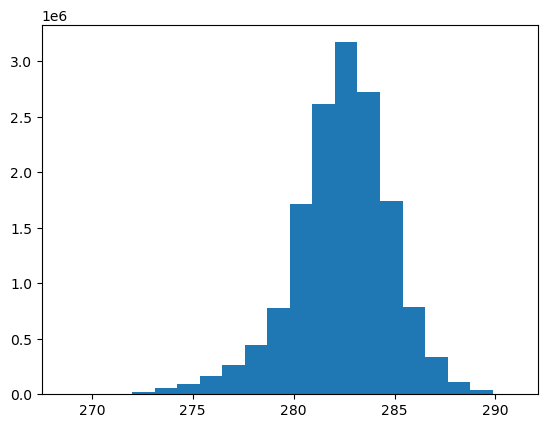

In [25]:
bar_widths = numpy.diff(frequency_cube.coord('temperature').bounds, axis=1)[:, 0]
matplotlib.pyplot.bar(frequency_cube.coord('temperature').points, frequency_cube.data, width=bar_widths)

In [26]:
ukv_max_max_temp = ukv_temp_max.collapsed(['time'], iris.analysis.MAX)
ukv_max_max_temp

<iris 'Cube' of air_temperature / (K) (grid_latitude: 808; grid_longitude: 621)>

In [27]:
ukv_max_max_temp.data.data

array([[289.25   , 289.25   , 289.25   , ..., 289.28125, 289.28125,
        289.23438],
       [289.25   , 289.25   , 289.23438, ..., 289.26562, 289.03125,
        289.0625 ],
       [289.23438, 289.23438, 289.23438, ..., 288.95312, 288.79688,
        288.85938],
       ...,
       [283.8125 , 283.76562, 283.71875, ..., 283.40625, 283.40625,
        283.40625],
       [283.82812, 283.76562, 283.71875, ..., 283.40625, 283.40625,
        283.39062],
       [283.82812, 283.76562, 283.70312, ..., 283.39062, 283.39062,
        283.40625]], dtype=float32)

### Gridded data - Dealing with projections
![Map Projections](https://imgs.xkcd.com/comics/map_projections.png)

Gridded data usually with wth a 2D representation of the earths surface. It will hopefully come as no surprise that the earth is not 2D (!!), so the representation of the earth's surface is a projection. Different map projections have different pros and cons. Different data will use different map projections dpending on how the data will be used. We use a library called [Cartopy](https://scitools.org.uk/cartopy/docs/latest/) to handle projections. We see that our data is in the *grid latitude* projection. We need project our ordinary latitude and longitude coordinates for the locvation we are dealing with nto grid latitude to be able to use them.

Info on projections
* [Map Projections - wikipedia](https://en.wikipedia.org/wiki/Map_projection)

Lets take a look again at the spatial extent covered by the dataset ion a way that we can understand, by transforming the grid latitude and grid longitude values into regular latitude and longitude values.

In [28]:
data_extent = {
 'grid_latitude': (ukv_temp_max.coord('grid_latitude').points.min(), ukv_temp_max.coord('grid_latitude').points.max(), ),
    'grid_longitude': (ukv_temp_max.coord('grid_longitude').points.min(), ukv_temp_max.coord('grid_longitude').points.max(), ),
}
data_extent

{'grid_latitude': (-3.7572, 7.1373005),
 'grid_longitude': (354.9424743652344, 363.3124745823443)}

In [29]:
ukv_gl_crs = ukv_temp_max.coord_system().as_cartopy_crs()

In [30]:
target_crs = cartopy.crs.PlateCarree() 

In [31]:
target_crs.transform_point(data_extent['grid_longitude'][0], data_extent['grid_latitude'][0], ukv_gl_crs)

(-10.125173900392756, 48.475716251900685)

In [32]:
target_crs.transform_point(data_extent['grid_longitude'][1], data_extent['grid_latitude'][1], ukv_gl_crs)

(3.984006556571579, 59.48854883517395)

Lets specify some regions of interest in human understandable coordinates like latitude and longitude. Then we'll use a cartopy function to transform the coordinates into those used by our dataset, so we can use them to specify subsets of the data.

In [33]:
devon_coords = {
    'latitude': (50.2, 51.3),
    'longitude': (-4.6,-2.8),
}

In [34]:
exeter_coords = {
    'latitude': 50.7,
    'longitude': -3.5,
}

In [35]:
exeter_gl = ukv_gl_crs.transform_point(exeter_coords['longitude'], exeter_coords['latitude'], cartopy.crs.PlateCarree() )
exeter_gl

(-0.6336727853830382, -1.7956128571573362)

In [36]:
devon_gl = [ ukv_gl_crs.transform_point(devon_coords['longitude'][ix1], devon_coords['latitude'][ix1], cartopy.crs.PlateCarree() ) for ix1 in range(len(devon_coords['latitude']))           ]

In [37]:
devon_gl = [(glong+360.0,glat) for (glong,glat) in devon_gl]

In [38]:
devon_gl

[(358.6548818289759, -2.2804428553555103),
 (359.81238660497036, -1.1996103278470946)]

#### Try it yourself
* Find the location in `grid_latitude` and `grid_longitude` for Edinburgh and London using the code above.
* Find the location bounds for scotland

In [39]:
edinburgh_location = (55.9, -3.2)
scotland_location = [(55.0, -8.0), (60.0, -1.0)]

In [40]:
edinburgh_gl = ukv_gl_crs.transform_point(edinburgh_location[1],edinburgh_location[0], cartopy.crs.PlateCarree() )
edinburgh_gl = (edinburgh_gl[0] + 360, edinburgh_gl[1])
edinburgh_gl

(359.606866629447, 3.401905256893151)

In [41]:
scotland_gl = [
    ukv_gl_crs.transform_point(scotland_location[0][1],scotland_location[0][0], cartopy.crs.PlateCarree() ),
    ukv_gl_crs.transform_point(scotland_location[1][1],scotland_location[1][0], cartopy.crs.PlateCarree() ),
    
]

In [42]:
# need to do a mod 360 operation to change the negative coord into the range [0,360]
scotland_gl = [(p1[0]+360, p1[1]) for p1 in scotland_gl]
scotland_gl

[(356.84528207572157, 2.620151982356139),
 (360.75642094383284, 7.507855559068217)]

## Visualising Data

One of the best way to investigate and interact with the data is to visulise it. Like pandas, both iris and xarray make use of the gridded data model to provide data aware convenient wrappers around matplotlib to more easily make geospatial plots. 

In [43]:
import iris.quickplot

First we'll plot it on a standard latitude and longitude grid. Because our data differently projected, we'll see that the plot looks a bit distorted in this projection called *PlateCarree*.

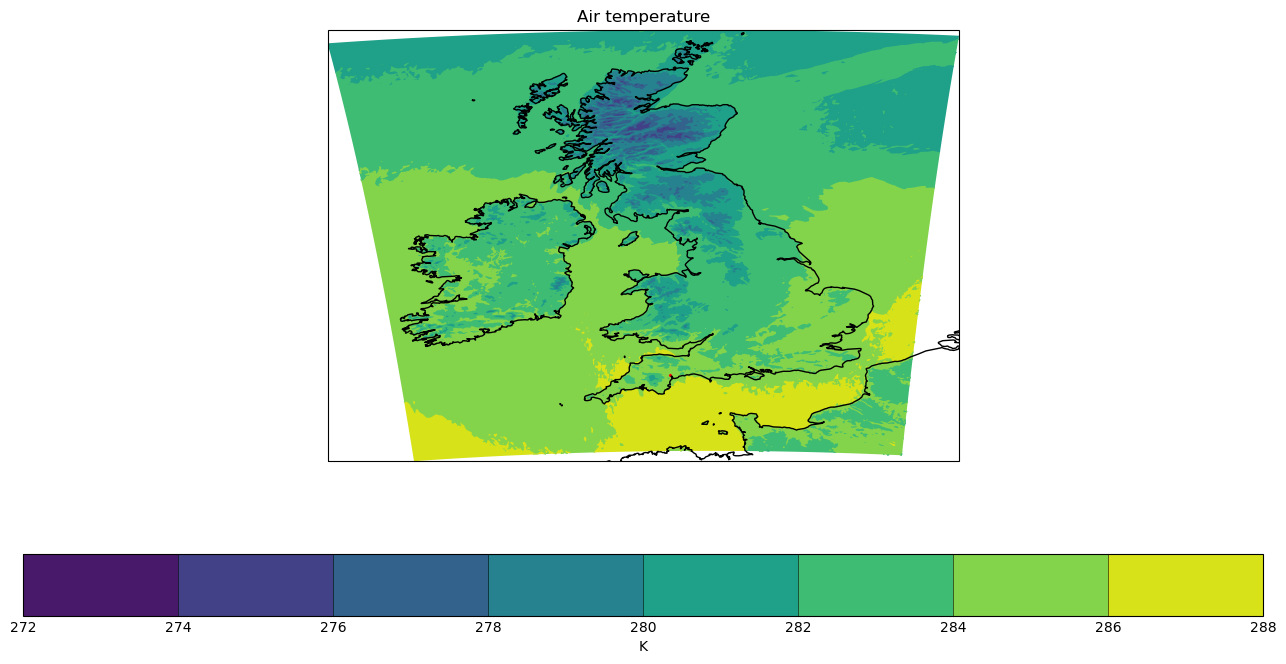

In [44]:
fig1 = matplotlib.pyplot.figure(figsize=(16,8))
ax1 = fig1.add_subplot(1,1,1,projection=cartopy.crs.PlateCarree())
iris.quickplot.contourf(ukv_temp_max[4,:,:],axes=ax1)
ax1.coastlines()
ax1.scatter(exeter_coords['longitude'],exeter_coords['latitude'],s=2,c='r',marker='x')

Instead we can plot it in the native projection of the data.

In [45]:
ukv_gl_crs

<Derived Geographic 2D CRS: +proj=ob_tran +a=6371229.0 +b=6371229.0 +o_proj=la ...>
Name: unnamed
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: PROJ ob_tran o_proj=latlon
Datum: unknown
- Ellipsoid: unknown
- Prime Meridian: Greenwich

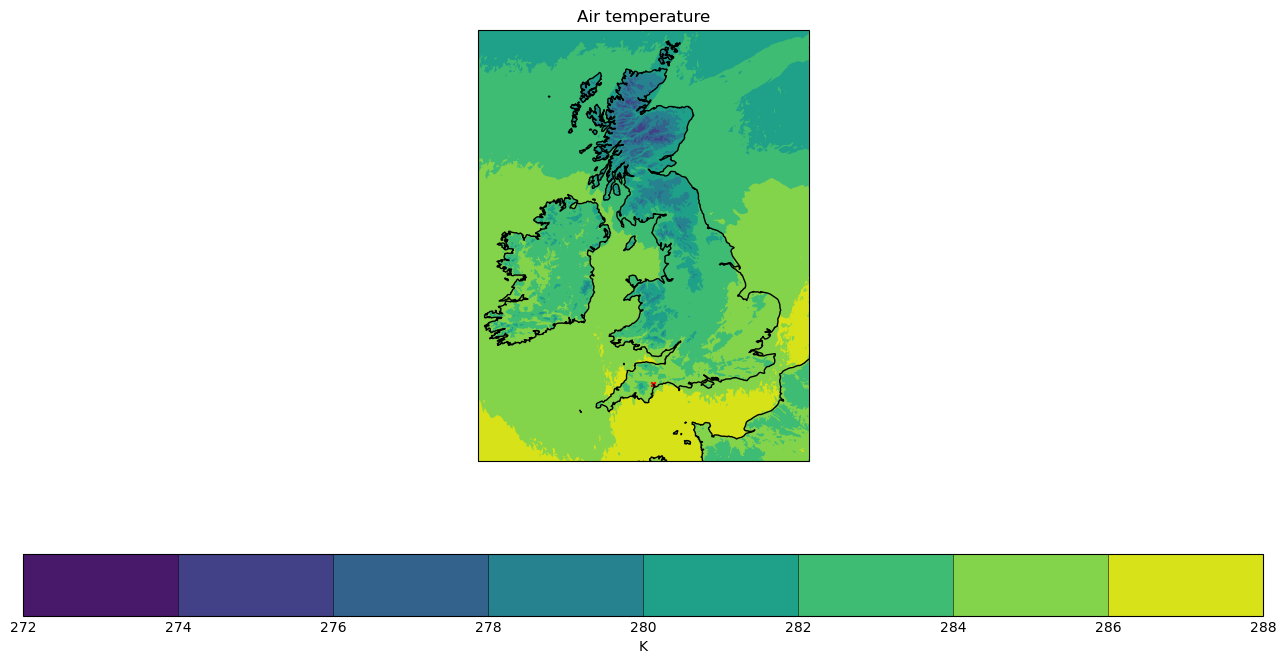

In [46]:
fig1 = matplotlib.pyplot.figure(figsize=(16,8))
ax1 = fig1.add_subplot(1,1,1,projection=ukv_temp_max.coord_system().as_cartopy_projection())
iris.quickplot.contourf(ukv_temp_max[4,:,:],axes=ax1)
ax1.coastlines()
ax1.scatter(exeter_gl[0],exeter_gl[1],s=10,c='r',marker='x')

### Extracting subsets

Often we don't want to just consider the whole dataset, but consider specific subsets , either by spatial location or by time.  We'll now use the coordinates we specified in the previous section to extract a subset representing devon and representing Exeter.

In [47]:
devon_temp_max = ukv_temp_max.extract(iris.Constraint(
    grid_latitude=lambda cell: devon_gl[0][1] < cell.point < devon_gl[1][1],
    grid_longitude=lambda cell: devon_gl[0][0] < cell.point < devon_gl[1][0],
))

In [48]:
devon_temp_max

<iris 'Cube' of air_temperature / (K) (time: 30; grid_latitude: 80; grid_longitude: 86)>

Lets investigate what range of times is available. We see that the data cover November 2019.

In [49]:
[c1.point for c1 in ukv_temp_max.coord('time').cells()]

[cftime.DatetimeGregorian(2019, 11, 1, 11, 30, 0, 0, has_year_zero=False),
 cftime.DatetimeGregorian(2019, 11, 2, 11, 30, 0, 0, has_year_zero=False),
 cftime.DatetimeGregorian(2019, 11, 3, 11, 30, 0, 0, has_year_zero=False),
 cftime.DatetimeGregorian(2019, 11, 4, 11, 30, 0, 0, has_year_zero=False),
 cftime.DatetimeGregorian(2019, 11, 5, 11, 30, 0, 0, has_year_zero=False),
 cftime.DatetimeGregorian(2019, 11, 6, 11, 30, 0, 0, has_year_zero=False),
 cftime.DatetimeGregorian(2019, 11, 7, 11, 30, 0, 0, has_year_zero=False),
 cftime.DatetimeGregorian(2019, 11, 8, 11, 30, 0, 0, has_year_zero=False),
 cftime.DatetimeGregorian(2019, 11, 9, 11, 30, 0, 0, has_year_zero=False),
 cftime.DatetimeGregorian(2019, 11, 10, 11, 30, 0, 0, has_year_zero=False),
 cftime.DatetimeGregorian(2019, 11, 11, 11, 30, 0, 0, has_year_zero=False),
 cftime.DatetimeGregorian(2019, 11, 12, 11, 30, 0, 0, has_year_zero=False),
 cftime.DatetimeGregorian(2019, 11, 13, 11, 30, 0, 0, has_year_zero=False),
 cftime.DatetimeGrego

Lets plot the daily data for a specific day, so we extract a subset for the specific day from the Devon subset, ready to plot.

In [50]:
selected_time = datetime.datetime(2019, 11, 5, 11, 30, 0, 0)

In [51]:
def compare_time(dt1, dt2):
    if dt1.year != dt2.year:
        return False
    if dt1.year != dt2.year:
        return False
    if dt1.month != dt2.month:
        return False
    if dt1.day != dt2.day:
        return False
    if dt1.hour != dt2.hour:
        return False
    if dt1.minute != dt2.minute:
        return False
    if dt1.second != dt2.second:
        return False
    return True    

In [52]:
devon_selectTime_temp_max = ukv_temp_max.extract(iris.Constraint(
    grid_latitude=lambda cell: devon_gl[0][1] < cell.point < devon_gl[1][1],
    grid_longitude=lambda cell: devon_gl[0][0] < cell.point < devon_gl[1][0],
    time=lambda cell: compare_time(cell.point, selected_time),
))

In [53]:
devon_selectTime_temp_max

<iris 'Cube' of air_temperature / (K) (grid_latitude: 80; grid_longitude: 86)>

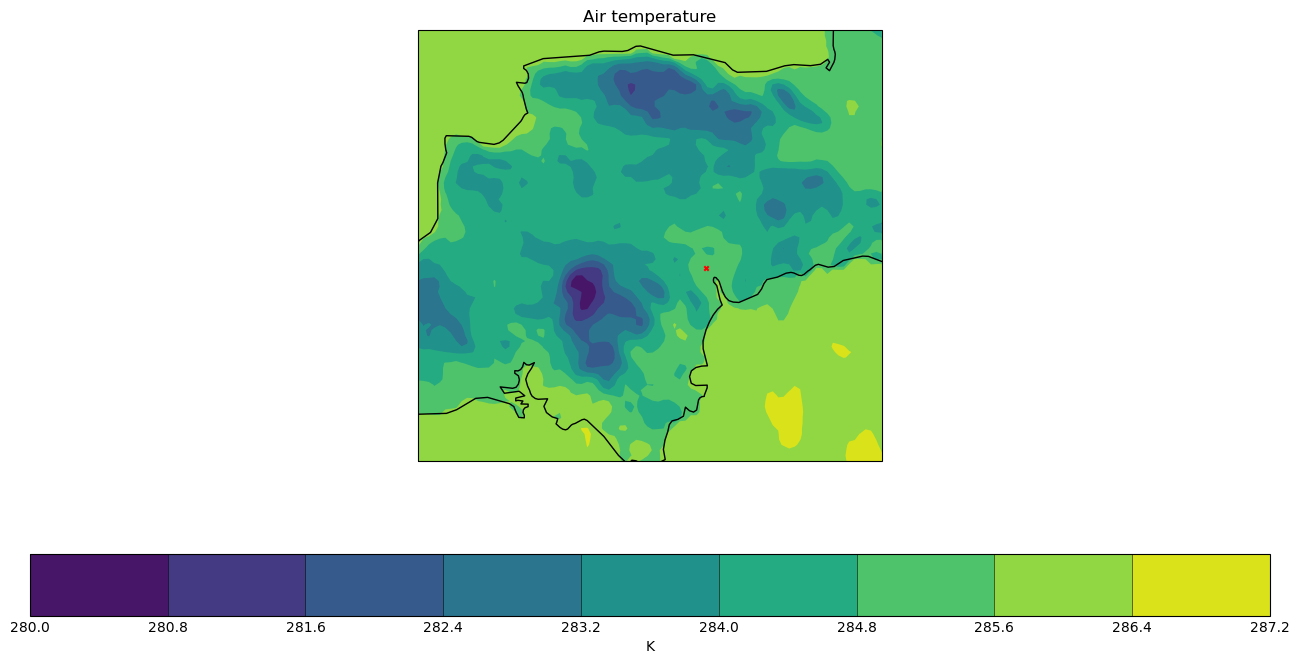

In [54]:
fig1 = matplotlib.pyplot.figure(figsize=(16,8))
ax1 = fig1.add_subplot(1,1,1,projection=devon_temp_max.coord_system().as_cartopy_projection())
iris.quickplot.contourf(devon_selectTime_temp_max,axes=ax1)
ax1.coastlines()
ax1.scatter(exeter_gl[0],exeter_gl[1],s=10,c='r',marker='x')

Instead of just subsetting, we may want to calculate a statistic which combines data, know in iris as *collapsiing a dimension*. In the earlier data exploration section, we calculated a cube representing the highest maximum temperature in the month for each data point. Now we can plot that data.

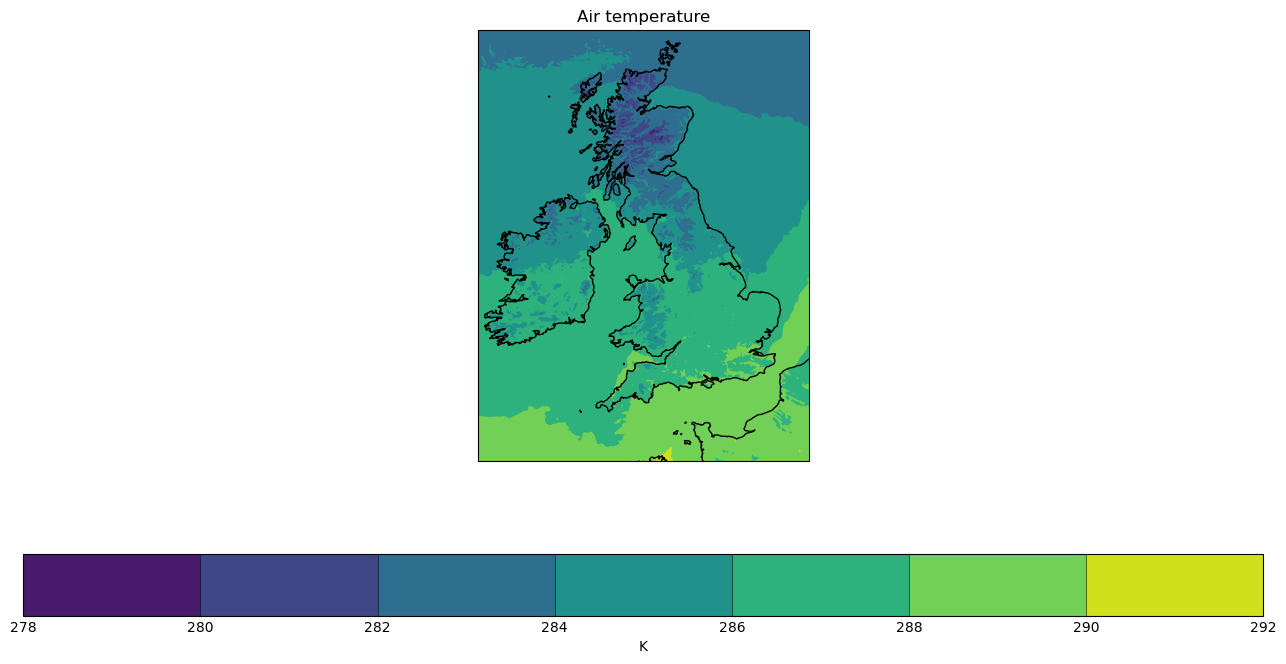

In [55]:
fig1 = matplotlib.pyplot.figure(figsize=(16,8))
ax1 = fig1.add_subplot(1,1,1,projection=ukv_max_max_temp.coord_system().as_cartopy_projection(), title='Maximum of max air temp for month')
iris.quickplot.contourf(ukv_max_max_temp,axes=ax1)
ax1.coastlines()

Similarly for our devon subset.

Instead of viewing values for all spatial points, we may want to collapse some spatial area into a single value. For example we may like a time series of maximum temperature averaged  over the whole of Devon. In this case we will collapse the latitude and longitude dimensions for our Devon subset leaving only time, rather than collapsing time.

In [56]:
devon_mean_max_temp = devon_temp_max.collapsed(['grid_latitude', 'grid_longitude'], iris.analysis.MEAN)
devon_mean_max_temp

Air Temperature (K),time
Shape,30
Dimension coordinates,
time,x
Auxiliary coordinates,
forecast_reference_time,x
Scalar coordinates,
forecast_period,"2.5 hours, bound=(0.0, 5.0) hours"
grid_latitude,"-1.73895 degrees, bound=(-2.2722, -1.2056999) degrees"
grid_longitude,"359.22872447641566 degrees, bound=(358.65497446153313, 359.8024744912982) degrees"
height,1.5 m


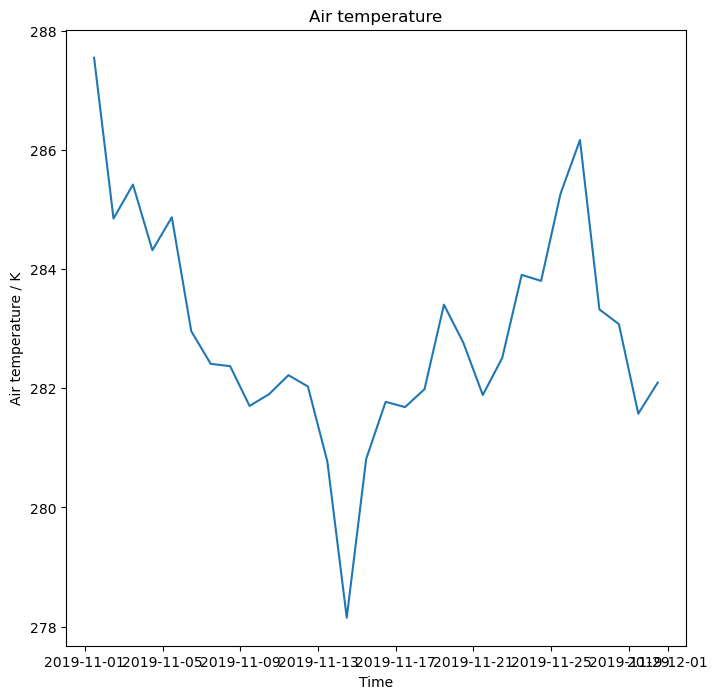

In [57]:
fig1 = matplotlib.pyplot.figure(figsize=(8,8))
ax1 = fig1.add_subplot(1,1,1,title='average devon max temp')
iris.quickplot.plot(devon_mean_max_temp,axes=ax1)

Alternatively we may want to get the values for a particular location, e.g. exeter, using the interpolate function.

[Iris Docs on interpolation](https://scitools-iris.readthedocs.io/en/stable/userguide/interpolation_and_regridding.html)

In [58]:
exeter_temp = ukv_temp_max.interpolate([('grid_latitude', exeter_gl[1]), ('grid_longitude', exeter_gl[0])], iris.analysis.Linear())
exeter_temp

Air Temperature (K),time
Shape,30
Dimension coordinates,
time,x
Auxiliary coordinates,
forecast_reference_time,x
Scalar coordinates,
forecast_period,"2.5 hours, bound=(0.0, 5.0) hours"
grid_latitude,-1.7956128571573362 degrees
grid_longitude,-0.6336727853830382 degrees
height,1.5 m


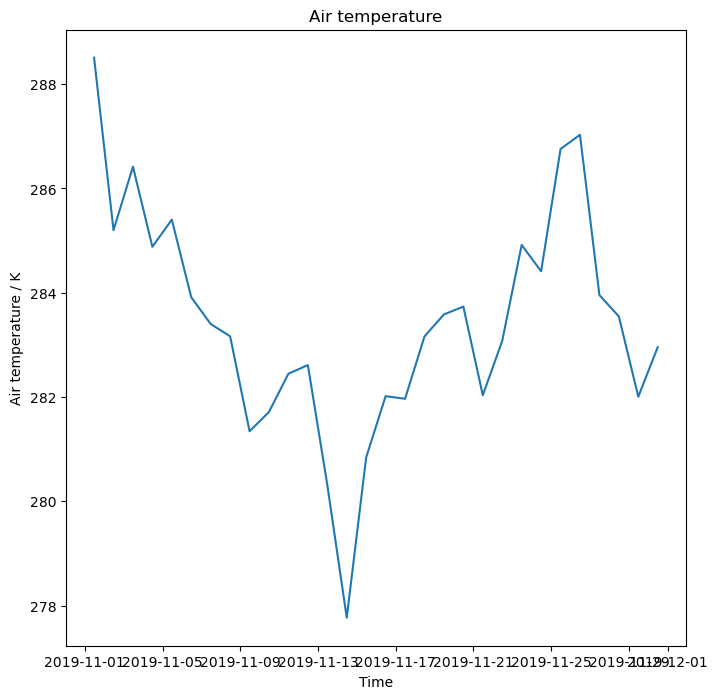

In [59]:
fig1 = matplotlib.pyplot.figure(figsize=(8,8))
ax1 = fig1.add_subplot(1,1,1,title='exeter max temp')
iris.quickplot.plot(exeter_temp,axes=ax1)

#### Try it yourself

Try to write some code to do the following
* Extract a subset for scotland using the coordinates you found earlier
* Plot the data for scotland for a single timestep with coastlines
* Extract and plot a time series for Edinburgh and London side-by-side

In [60]:
# Insert exercse code here

In [62]:
edinburgh_max_temp = ukv_temp_max.interpolate([('grid_latitude', edinburgh_gl[1]), ('grid_longitude', edinburgh_gl[0])], iris.analysis.Linear())

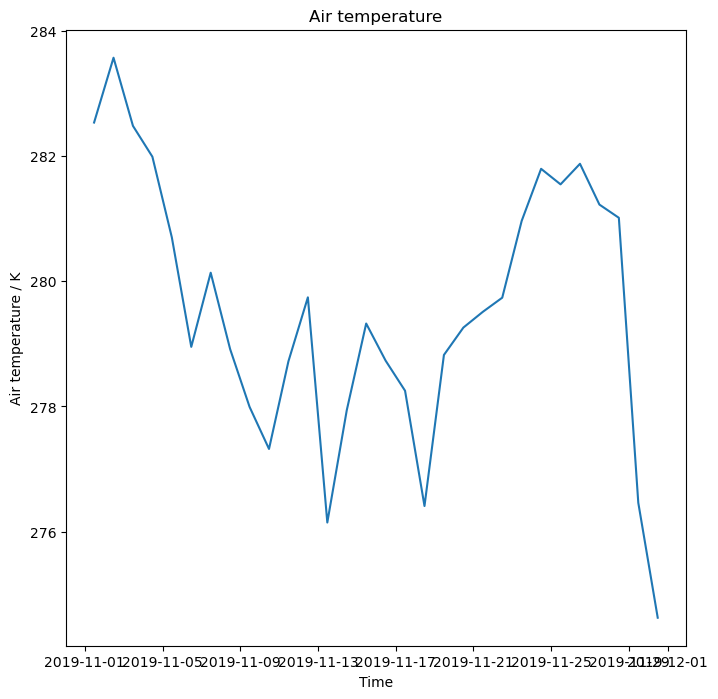

In [63]:
fig1 = matplotlib.pyplot.figure(figsize=(8,8))
ax1 = fig1.add_subplot(1,1,1,title='average devon max temp')
iris.quickplot.plot(edinburgh_max_temp,axes=ax1)

In [64]:
scotland_temp_max = ukv_temp_max.extract(iris.Constraint(
    grid_latitude=lambda cell: scotland_gl[0][1] < cell.point < scotland_gl[1][1],
    grid_longitude=lambda cell: scotland_gl[0][0] < cell.point < scotland_gl[1][0],
))

In [65]:
scotland_gl

[(356.84528207572157, 2.620151982356139),
 (360.75642094383284, 7.507855559068217)]

In [66]:
scotland_temp_max

<iris 'Cube' of air_temperature / (K) (time: 30; grid_latitude: 335; grid_longitude: 290)>

In [67]:
edinburgh_gl

(359.606866629447, 3.401905256893151)

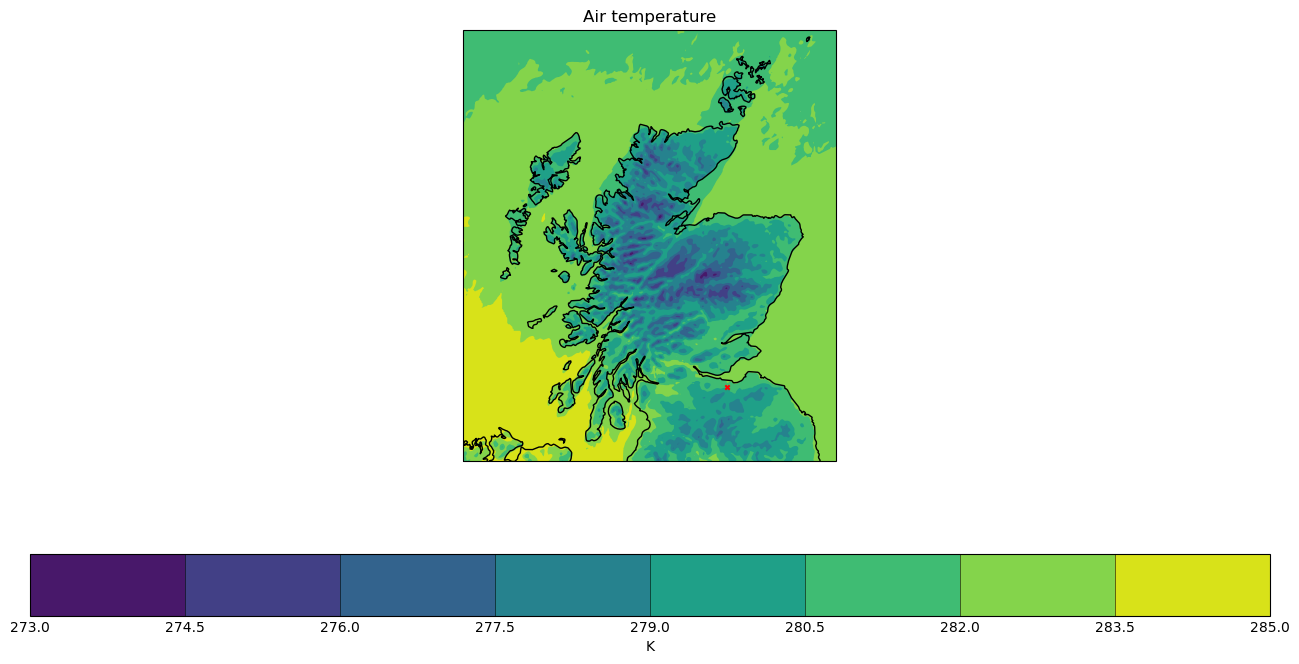

In [68]:
fig1 = matplotlib.pyplot.figure(figsize=(16,8))
ax1 = fig1.add_subplot(1,1,1,projection=devon_temp_max.coord_system().as_cartopy_projection())
iris.quickplot.contourf(
    scotland_temp_max.extract(iris.Constraint(time=lambda cell: compare_time(cell.point, selected_time))),
    axes=ax1,
)
ax1.coastlines()
ax1.scatter(edinburgh_gl[0],edinburgh_gl[1],s=10,c='r',marker='x')

## Alternative tools - Xarray

Now we will perform some similar operations using xarray with a different dataset to demonstrate the different interfaces for the two libraries.

### Exploring Climate Model Data - UK Climate Projections

Climate Dataset - UKCP
The second dataset is a climate dataset, UK Climate Predictions. The lastest version is UKCP18. This is a climate dataset, so rather than running for a few days, it simulates the atmosphere over 100 years. With climate data, we are not interested in instantaneous values as we are in weather, but rather avrages over periods of time, such as months or years.

Further reading
* [UKCP information](https://www.metoffice.gov.uk/research/approach/collaboration/ukcp/index)
* [UKCP data access](https://ukclimateprojections-ui.metoffice.gov.uk/ui/home)

In [69]:
ukcp_root_dir = sample_data_root / 'ukcp_rcp85'

In [70]:
list(ukcp_root_dir.rglob('*nc'))

[PosixPath('/Users/stephen.haddad/data/ukcp_rcp85/sfcWind/sfcWind_rcp85_land-cpm_uk_2.2km_01_day_20651201-20661130.nc'),
 PosixPath('/Users/stephen.haddad/data/ukcp_rcp85/psl/psl_rcp85_land-cpm_uk_2.2km_01_day_20651201-20661130.nc'),
 PosixPath('/Users/stephen.haddad/data/ukcp_rcp85/pr/pr_rcp85_land-cpm_uk_2.2km_01_day_20651201-20661130.nc'),
 PosixPath('/Users/stephen.haddad/data/ukcp_rcp85/tasmax/tasmax_rcp85_land-cpm_uk_2.2km_01_day_20651201-20661130.nc'),
 PosixPath('/Users/stephen.haddad/data/ukcp_rcp85/tasmin/tasmin_rcp85_land-cpm_uk_2.2km_01_day_20651201-20661130.nc')]

In [71]:
%%time 
ukcp_ds = xarray.merge([xarray.load_dataset(str(p1)) for p1 in list(ukcp_root_dir.rglob('*nc')) ])
ukcp_ds

CPU times: user 9.52 s, sys: 9.91 s, total: 19.4 s
Wall time: 22.5 s


<xarray.Dataset>
Dimensions:                     (ensemble_member: 1, time: 360,
                                 grid_latitude: 1213, grid_longitude: 484,
                                 bnds: 2)
Coordinates:
  * ensemble_member             (ensemble_member) int32 1
  * time                        (time) object 2065-12-01 12:00:00 ... 2066-11...
  * grid_latitude               (grid_latitude) float64 -4.701 -4.683 ... 8.081
  * grid_longitude              (grid_longitude) float64 353.9 354.0 ... 364.3
    ensemble_member_id          (ensemble_member) |S27 b'HadREM3-RA11M-r001i1...
    latitude                    (grid_latitude, grid_longitude) float64 47.42...
    longitude                   (grid_latitude, grid_longitude) float64 -11.4...
    month_number                (time) int32 12 12 12 12 12 ... 11 11 11 11 11
    year                        (time) int32 2065 2065 2065 ... 2066 2066 2066
    yyyymmdd                    (time) |S64 b'20651201                       ...
Dimensions without coordinates: bnds
Data variables:
    sfcWind                     (ensemble_member, time, grid_latitude, grid_longitude) float32 ...
    rotated_latitude_longitude  int32 -2147483647
    time_bnds                   (time, bnds) object 2065-12-01 00:00:00 ... 2...
    grid_latitude_bnds          (grid_latitude, bnds) float64 -4.719 ... 8.099
    grid_longitude_bnds         (grid_longitude, bnds) float64 353.9 ... 364.3
    psl                         (ensemble_member, time, grid_latitude, grid_longitude) float32 ...
    pr                          (ensemble_member, time, grid_latitude, grid_longitude) float32 ...
    tasmax                      (ensemble_member, time, grid_latitude, grid_longitude) float32 ...
    tasmin                      (ensemble_member, time, grid_latitude, grid_longitude) float32 ...
Attributes: (12/15)
    collection:      land-cpm
    contact:         ukcpproject@metoffice.gov.uk
    creation_date:   2019-07-30T08:18:16
    domain:          uk
    frequency:       day
    institution:     Met Office Hadley Centre (MOHC), FitzRoy Road, Exeter, D...
    ...              ...
    resolution:      2.2km
    scenario:        rcp85
    source:          UKCP18 realisation from a set of 12 convection-permittin...
    title:           UKCP18 land projections - 2.2km convection-permitting cl...
    version:         v20190731
    Conventions:     CF-1.5

In [72]:
ukcp_ds['tasmax']

<xarray.DataArray 'tasmax' (ensemble_member: 1, time: 360, grid_latitude: 1213,
                            grid_longitude: 484)>
array([[[[        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [16.98916   , 16.994532  , 17.001612  , ..., 14.527246  ,
          14.466211  , 14.3988285 ],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         ...,
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [11.346582  , 11.3380375 , 11.339014  , ..., -0.13266602,
          -0.10166015, -0.46567383],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan]],

        [[        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [16.946192  , 16.968653  , 16.990625  , ..., 15.1661625 ,
          15.4769535 , 15.422754  ],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
...
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [11.402491  , 11.409815  , 11.417139  , ...,  8.852198  ,
           8.95083   ,  9.342432  ],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan]],

        [[        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [15.777246  , 15.775293  , 15.76626   , ..., 10.168604  ,
           9.911768  ,  9.598291  ],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         ...,
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [11.758936  , 11.72793   , 11.707422  , ...,  4.09292   ,
           3.976709  ,  3.8858886 ],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan]]]], dtype=float32)
Coordinates:
  * ensemble_member     (ensemble_member) int32 1
  * time                (time) object 2065-12-01 12:00:00 ... 2066-11-30 12:0...
  * grid_latitude       (grid_latitude) float64 -4.701 -4.683 ... 8.063 8.081
  * grid_longitude      (grid_longitude) float64 353.9 354.0 ... 364.3 364.3
    ensemble_member_id  (ensemble_member) |S27 b'HadREM3-RA11M-r001i1p00000 '
    latitude            (grid_latitude, grid_longitude) float64 47.42 ... 60.32
    longitude           (grid_latitude, grid_longitude) float64 -11.45 ... 6.134
    month_number        (time) int32 12 12 12 12 12 12 12 ... 11 11 11 11 11 11
    year                (time) int32 2065 2065 2065 2065 ... 2066 2066 2066 2066
    yyyymmdd            (time) |S64 b'20651201                               ...
Attributes:
    standard_name:  air_temperature
    long_name:      Maximum air temperature
    units:          degC
    description:    Maximum air temperature
    label_units:    °C
    plot_label:     Maximum air temperature at 1.5m (°C)
    cell_methods:   time: mean
    grid_mapping:   rotated_latitude_longitude

In [73]:
ukcp_ds.coords['time'].values[:10]

array([cftime.Datetime360Day(2065, 12, 1, 12, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2065, 12, 2, 12, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2065, 12, 3, 12, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2065, 12, 4, 12, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2065, 12, 5, 12, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2065, 12, 6, 12, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2065, 12, 7, 12, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2065, 12, 8, 12, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2065, 12, 9, 12, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2065, 12, 10, 12, 0, 0, 0, has_year_zero=True)],
      dtype=object)

In [74]:
import cftime

In [75]:
devon_ds = ukcp_ds.sel(grid_latitude=slice(devon_gl[0][1], devon_gl[1][1]),
            grid_longitude=slice(devon_gl[0][0], devon_gl[1][0]),
            time=slice(cftime.Datetime360Day(2066,3,25), cftime.Datetime360Day(2066,4,11))
           )
devon_ds

<xarray.Dataset>
Dimensions:                     (ensemble_member: 1, time: 16,
                                 grid_latitude: 109, grid_longitude: 58, bnds: 2)
Coordinates:
  * ensemble_member             (ensemble_member) int32 1
  * time                        (time) object 2066-03-25 12:00:00 ... 2066-04...
  * grid_latitude               (grid_latitude) float64 -2.28 -2.27 ... -1.2
  * grid_longitude              (grid_longitude) float64 358.7 358.7 ... 359.8
    ensemble_member_id          (ensemble_member) |S27 b'HadREM3-RA11M-r001i1...
    latitude                    (grid_latitude, grid_longitude) float64 50.2 ...
    longitude                   (grid_latitude, grid_longitude) float64 -4.57...
    month_number                (time) int32 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4
    year                        (time) int32 2066 2066 2066 ... 2066 2066 2066
    yyyymmdd                    (time) |S64 b'20660325                       ...
Dimensions without coordinates: bnds
Data variables:
    sfcWind                     (ensemble_member, time, grid_latitude, grid_longitude) float32 ...
    rotated_latitude_longitude  int32 -2147483647
    time_bnds                   (time, bnds) object 2066-03-25 00:00:00 ... 2...
    grid_latitude_bnds          (grid_latitude, bnds) float64 -2.29 ... -1.19
    grid_longitude_bnds         (grid_longitude, bnds) float64 358.7 ... 359.8
    psl                         (ensemble_member, time, grid_latitude, grid_longitude) float32 ...
    pr                          (ensemble_member, time, grid_latitude, grid_longitude) float32 ...
    tasmax                      (ensemble_member, time, grid_latitude, grid_longitude) float32 ...
    tasmin                      (ensemble_member, time, grid_latitude, grid_longitude) float32 ...
Attributes: (12/15)
    collection:      land-cpm
    contact:         ukcpproject@metoffice.gov.uk
    creation_date:   2019-07-30T08:18:16
    domain:          uk
    frequency:       day
    institution:     Met Office Hadley Centre (MOHC), FitzRoy Road, Exeter, D...
    ...              ...
    resolution:      2.2km
    scenario:        rcp85
    source:          UKCP18 realisation from a set of 12 convection-permittin...
    title:           UKCP18 land projections - 2.2km convection-permitting cl...
    version:         v20190731
    Conventions:     CF-1.5

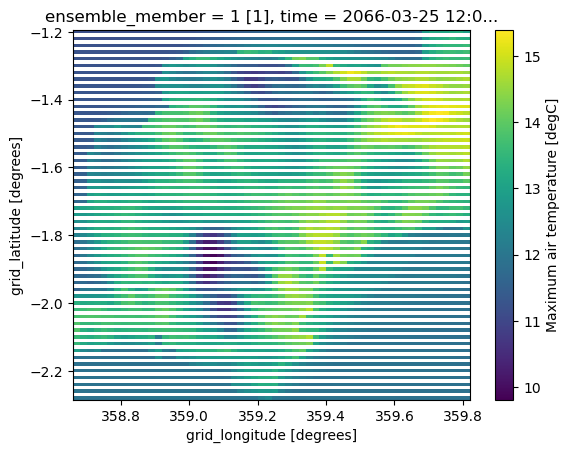

In [76]:
devon_ds.sel(time=cftime.Datetime360Day(2066,3,25,12,0,0),ensemble_member=1)['tasmax'].plot.pcolormesh()
           

In [77]:
%%time
exeter_ts = devon_ds .sel(grid_latitude=exeter_gl[0], grid_longitude=exeter_gl[1],method='nearest')

CPU times: user 2.98 ms, sys: 553 µs, total: 3.53 ms
Wall time: 4.47 ms


In [78]:
exeter_ts

<xarray.Dataset>
Dimensions:                     (ensemble_member: 1, time: 16, bnds: 2)
Coordinates:
  * ensemble_member             (ensemble_member) int32 1
  * time                        (time) object 2066-03-25 12:00:00 ... 2066-04...
    grid_latitude               float64 -1.2
    grid_longitude              float64 358.7
    ensemble_member_id          (ensemble_member) |S27 b'HadREM3-RA11M-r001i1...
    latitude                    float64 51.28
    longitude                   float64 -4.625
    month_number                (time) int32 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4
    year                        (time) int32 2066 2066 2066 ... 2066 2066 2066
    yyyymmdd                    (time) |S64 b'20660325                       ...
Dimensions without coordinates: bnds
Data variables:
    sfcWind                     (ensemble_member, time) float32 nan nan ... nan
    rotated_latitude_longitude  int32 -2147483647
    time_bnds                   (time, bnds) object 2066-03-25 00:00:00 ... 2...
    grid_latitude_bnds          (bnds) float64 -1.21 -1.19
    grid_longitude_bnds         (bnds) float64 358.7 358.7
    psl                         (ensemble_member, time) float32 1.011e+03 ......
    pr                          (ensemble_member, time) float32 1.416 ... 3.2...
    tasmax                      (ensemble_member, time) float32 11.16 ... 10.04
    tasmin                      (ensemble_member, time) float32 9.767 ... 7.368
Attributes: (12/15)
    collection:      land-cpm
    contact:         ukcpproject@metoffice.gov.uk
    creation_date:   2019-07-30T08:18:16
    domain:          uk
    frequency:       day
    institution:     Met Office Hadley Centre (MOHC), FitzRoy Road, Exeter, D...
    ...              ...
    resolution:      2.2km
    scenario:        rcp85
    source:          UKCP18 realisation from a set of 12 convection-permittin...
    title:           UKCP18 land projections - 2.2km convection-permitting cl...
    version:         v20190731
    Conventions:     CF-1.5

In [79]:
exeter_ts.tasmax

<xarray.DataArray 'tasmax' (ensemble_member: 1, time: 16)>
array([[11.163477 , 10.714014 , 10.54043  , 10.410059 , 11.030176 ,
        10.877344 , 10.7442875, 10.451075 , 10.63833  , 10.655176 ,
         8.582422 ,  9.638819 ,  8.786768 ,  9.630762 ,  9.933008 ,
        10.040186 ]], dtype=float32)
Coordinates:
  * ensemble_member     (ensemble_member) int32 1
  * time                (time) object 2066-03-25 12:00:00 ... 2066-04-10 12:0...
    grid_latitude       float64 -1.2
    grid_longitude      float64 358.7
    ensemble_member_id  (ensemble_member) |S27 b'HadREM3-RA11M-r001i1p00000 '
    latitude            float64 51.28
    longitude           float64 -4.625
    month_number        (time) int32 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4
    year                (time) int32 2066 2066 2066 2066 ... 2066 2066 2066 2066
    yyyymmdd            (time) |S64 b'20660325                               ...
Attributes:
    standard_name:  air_temperature
    long_name:      Maximum air temperature
    units:          degC
    description:    Maximum air temperature
    label_units:    °C
    plot_label:     Maximum air temperature at 1.5m (°C)
    cell_methods:   time: mean
    grid_mapping:   rotated_latitude_longitude

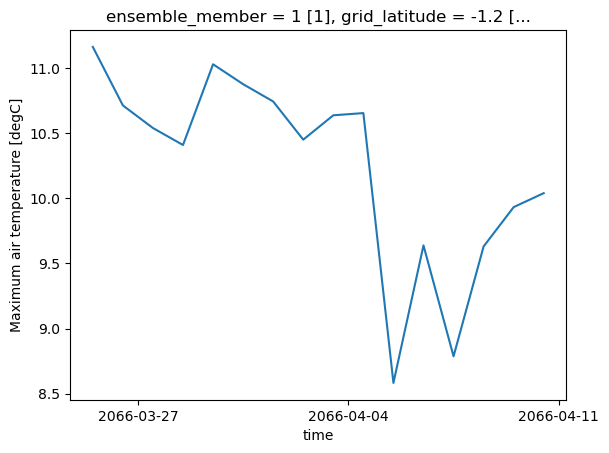

In [80]:
exeter_ts.tasmax.plot(x='time')

### Examples of use

#### Model Data
See session 3 notebooks on examples of gridded data, such as:
* [Met Office Weather Simulation Data](https://www.metoffice.gov.uk/services/government/defence-and-security/models)
* [UK Climate Projections](https://www.metoffice.gov.uk/research/approach/collaboration/ukcp) - Forecasts of UK climate conditions for the 21st century.
* [Global Climnate Data from CMIP6](https://www.wcrp-climate.org/wgcm-cmip/wgcm-cmip6)
  * [MoreCMIP6 info from Carbon Brief](https://www.carbonbrief.org/cmip6-the-next-generation-of-climate-models-explained/)
* [ERA5 Renalsysis Data](https://www.ecmwf.int/en/forecasts/datasets/reanalysis-datasets/era5) - A global dataset of oservations, processed (or *renanalysed*) using a physic-based model to merge the many different observation modes into a single physically realistic dataset.
  * [ERA5 data on AWS](https://registry.opendata.aws/ecmwf-era5/)
  
#### Satelite Data
Similar but slightly different is data from satellites or other sorts of images. 
* [Met Office Info on Satellite Imagery](https://www.metoffice.gov.uk/research/weather/satellite-applications/satellite-imagery)
* [EUMetSat Image Viewer](https://view.eumetsat.int/productviewer?v=default)

### References

* [Met Office Data Glossary](https://www.metoffice.gov.uk/services/data/business-data/glossary)

Libraries
* [numpy]()
* [iris]()
* [cartopy]()
* [xarray]()
* [matplotlib]()